Please upload the dataset (CSV file)


Saving Employee_Salary_Dataset.csv to Employee_Salary_Dataset (8).csv


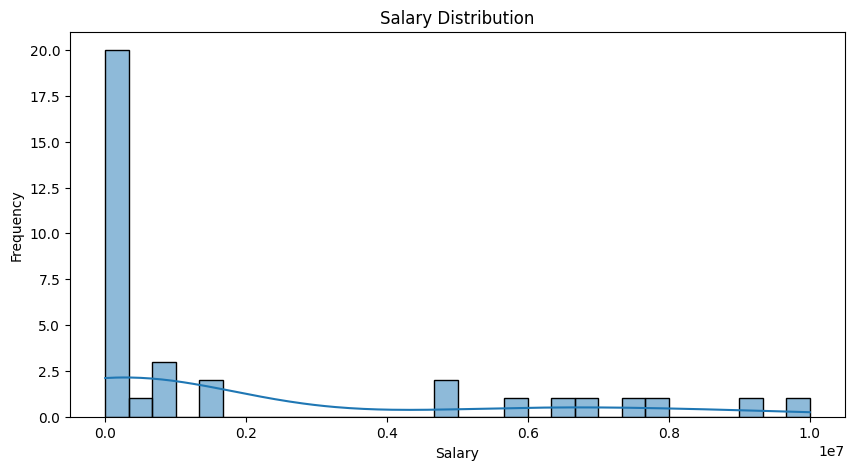


--------------------------------------------



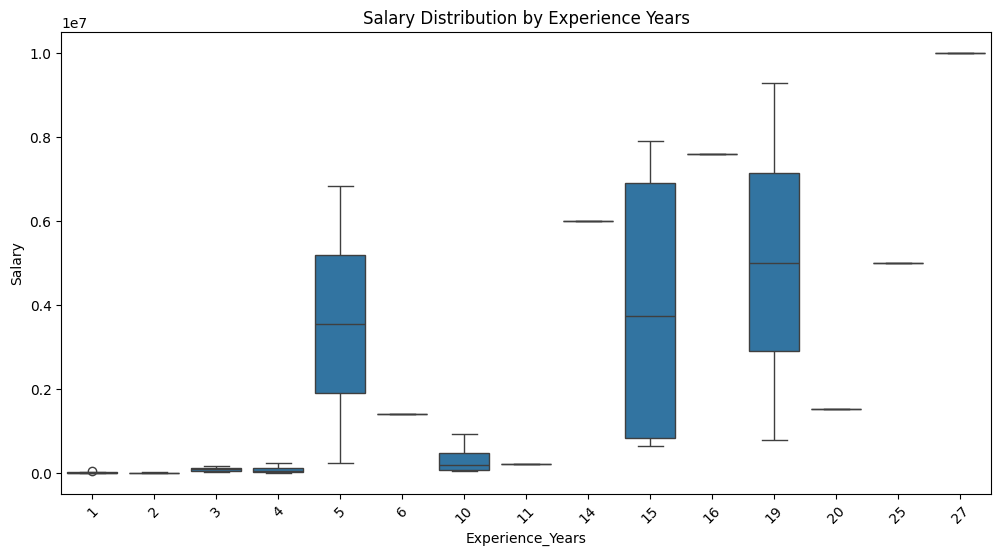


--------------------------------------------



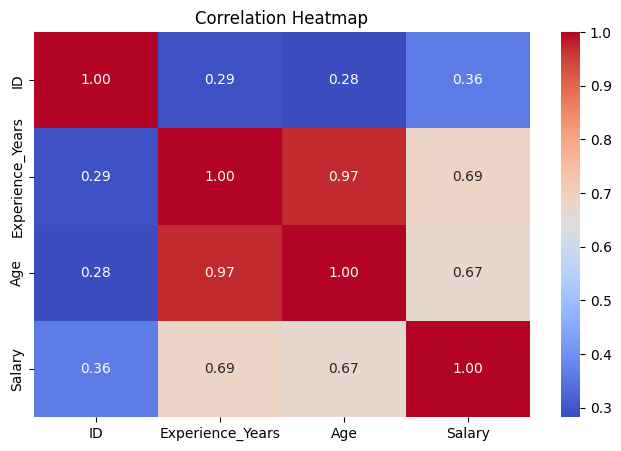


--------------------------------------------



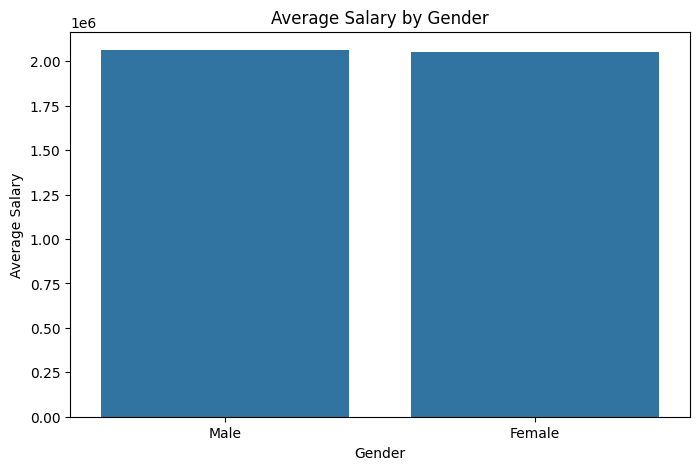


--------------------------------------------



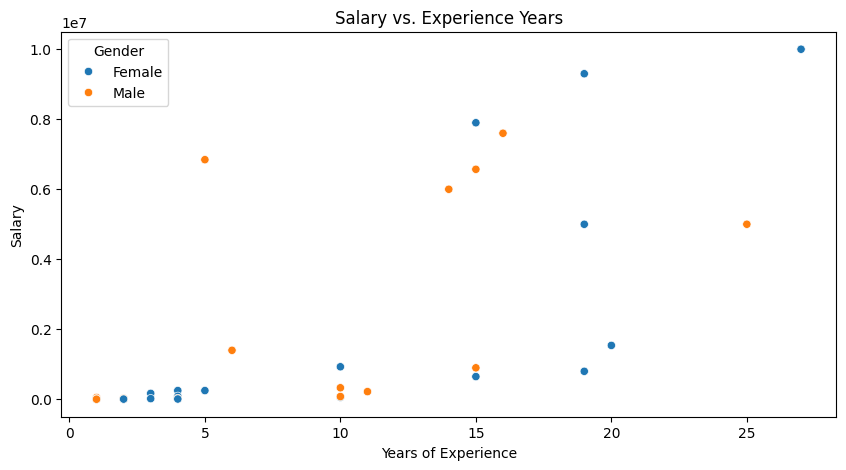


Analysis Complete! Thank you for using the Employee Salary Analysis tool.


In [11]:
# Employee Salary Analysis

# This script performs an analysis of employee salaries based on various factors such as experience, age, and gender.
# It includes data visualization techniques to understand the distribution and correlation between different variables.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# Upload the dataset
print("Please upload the dataset (CSV file)")
uploaded = files.upload()

# Get the filename
filename = list(uploaded.keys())[0]

# Load the dataset
df = pd.read_csv(filename)

# Ensure correct column names by stripping whitespace
df.columns = df.columns.str.strip()


# Ensure Salary column is numeric
df['Salary'] = pd.to_numeric(df['Salary'], errors='coerce')

# Visualizing Salary Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Salary'].dropna(), bins=30, kde=True)
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

# Spacer for readability
print("\n--------------------------------------------\n")

# Boxplot of Salaries by Experience Years
plt.figure(figsize=(12, 6))
sns.boxplot(x='Experience_Years', y='Salary', data=df)
plt.xticks(rotation=45)
plt.title('Salary Distribution by Experience Years')
plt.show()

# Spacer for readability
print("\n--------------------------------------------\n")

# Correlation Heatmap (excluding non-numeric columns)
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Spacer for readability
print("\n--------------------------------------------\n")

# Bar chart of Average Salary by Gender
plt.figure(figsize=(8, 5))
if 'Gender' in df.columns:
    avg_salary = df.groupby('Gender')['Salary'].mean().sort_values(ascending=False)
    sns.barplot(x=avg_salary.index, y=avg_salary.values)
    plt.title('Average Salary by Gender')
    plt.ylabel('Average Salary')
    plt.xlabel('Gender')
    plt.show()
else:
    print("Column 'Gender' not found in dataset")

# Spacer for readability
print("\n--------------------------------------------\n")

# Scatter plot of Salary vs. Experience Years
plt.figure(figsize=(10, 5))
if 'Experience_Years' in df.columns:
    sns.scatterplot(x='Experience_Years', y='Salary', hue=df['Gender'] if 'Gender' in df.columns else None, data=df)
    plt.title('Salary vs. Experience Years')
    plt.xlabel('Years of Experience')
    plt.ylabel('Salary')
    plt.show()
else:
    print("Column 'Experience_Years' not found in dataset")

print("\nAnalysis Complete! Thank you for using the Employee Salary Analysis tool.")